In [1]:
# Run this cell to import libraries needed to run the examples
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

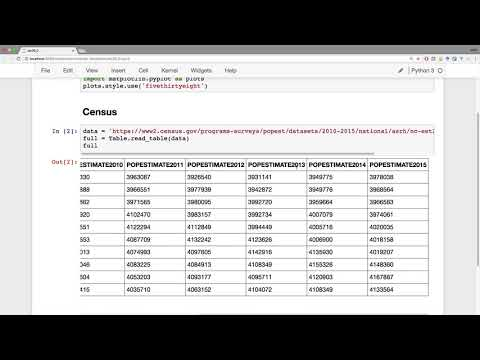

In [1]:
#https://www.youtube.com/watch?v=b29OrPn5ofw
from IPython.display import YouTubeVideo

YouTubeVideo('b29OrPn5ofw', width=800, height=300)

## Census

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

# A copy can be accessed here in case census.gov moves the file:
# data = 'http://inferentialthinking.com/notebooks/nc-est2015-agesex-res.csv'

# Documentation is online here:
# https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2015/nc-est2015-agesex-res.pdf

full = Table.read_table('census.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


In [3]:
partial = full.select('SEX', 'AGE', 4, 9)
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2015
0,0,3951330,3978038
0,1,3957888,3968564
0,2,4090862,3966583
0,3,4111920,3974061
0,4,4077551,4020035
0,5,4064653,4018158
0,6,4073013,4019207
0,7,4043046,4148360
0,8,4025604,4167887
0,9,4125415,4133564


In [4]:
us_pop = partial.relabeled(2, '2010').relabeled(3, '2015')
us_pop

SEX,AGE,2010,2015
0,0,3951330,3978038
0,1,3957888,3968564
0,2,4090862,3966583
0,3,4111920,3974061
0,4,4077551,4020035
0,5,4064653,4018158
0,6,4073013,4019207
0,7,4043046,4148360
0,8,4025604,4167887
0,9,4125415,4133564


In [5]:
us_pop.set_format([2, 3], NumberFormatter)

SEX,AGE,2010,2015
0,0,"3,951,330","3,978,038"
0,1,"3,957,888","3,968,564"
0,2,"4,090,862","3,966,583"
0,3,"4,111,920","3,974,061"
0,4,"4,077,551","4,020,035"
0,5,"4,064,653","4,018,158"
0,6,"4,073,013","4,019,207"
0,7,"4,043,046","4,148,360"
0,8,"4,025,604","4,167,887"
0,9,"4,125,415","4,133,564"


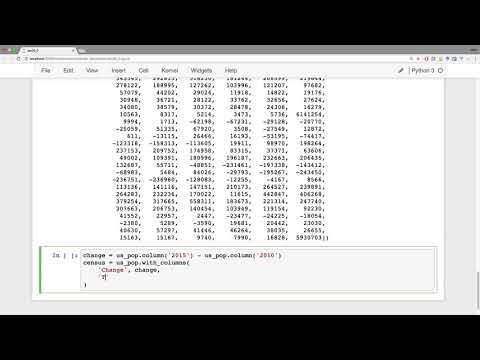

In [2]:

from IPython.display import YouTubeVideo

YouTubeVideo('4SLry5hYcmE', width=800, height=300)

## Column Arithmetic

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [6]:
2015 - 2010

5

In [7]:
'2015' - '2010'

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [8]:
us_pop.column('2015') - us_pop.column('2010')

array([   26708,    10676,  -124279,  -137859,   -57516,   -46495,
         -53806,   105314,   142283,     8149,   -65773,    14817,
         -12258,   -35360,    39772,    18740,  -128956,  -182081,
        -273010,  -308827,  -205077,    68834,   242467,   435038,
         493743,   440136,   383610,   202740,   117128,   172853,
         112970,   235717,   376012,   408173,   472649,   431069,
         278576,   131637,   -93087,  -453601,  -397641,  -298250,
        -158454,     6864,   156657,   -49214,  -369143,  -461788,
        -456974,  -446546,  -245943,   -19310,    -6240,    24091,
         228080,   294415,   305984,   424727,   518075,   469416,
         509071,   434492,   306876,     -774,   830101,   771518,
         722799,   610480,  1076541,   364917,   429913,   467584,
         585785,   395748,   267716,   207945,   240361,   189912,
          98631,    67159,    31471,   -11559,    -9403,     1122,
          28568,    42010,    24532,    53443,    53098,    50

In [9]:
change = us_pop.column('2015') - us_pop.column('2010')
census = us_pop.with_columns(
    'Change', change,
    'Total Growth', change / us_pop.column('2010')
)
census.set_format('Change', NumberFormatter)
census.set_format('Total Growth', PercentFormatter)

SEX,AGE,2010,2015,Change,Total Growth
0,0,"3,951,330","3,978,038","26,708",0.68%
0,1,"3,957,888","3,968,564","10,676",0.27%
0,2,"4,090,862","3,966,583","-124,279",-3.04%
0,3,"4,111,920","3,974,061","-137,859",-3.35%
0,4,"4,077,551","4,020,035","-57,516",-1.41%
0,5,"4,064,653","4,018,158","-46,495",-1.14%
0,6,"4,073,013","4,019,207","-53,806",-1.32%
0,7,"4,043,046","4,148,360","105,314",2.60%
0,8,"4,025,604","4,167,887","142,283",3.53%
0,9,"4,125,415","4,133,564","8,149",0.20%


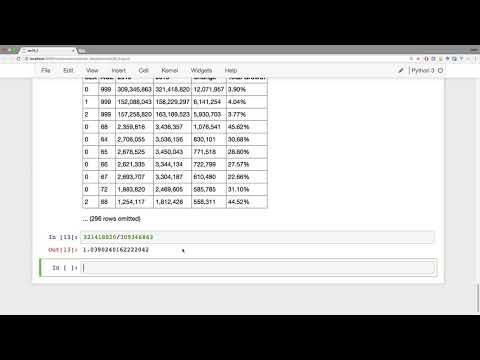

In [3]:

from IPython.display import YouTubeVideo

YouTubeVideo('EOrAk4r9kck', width=800, height=300)

## Accessing Values

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [10]:
census.sort('Change', descending=True)

SEX,AGE,2010,2015,Change,Total Growth
0,999,"309,346,863","321,418,820","12,071,957",3.90%
1,999,"152,088,043","158,229,297","6,141,254",4.04%
2,999,"157,258,820","163,189,523","5,930,703",3.77%
0,68,"2,359,816","3,436,357","1,076,541",45.62%
0,64,"2,706,055","3,536,156","830,101",30.68%
0,65,"2,678,525","3,450,043","771,518",28.80%
0,66,"2,621,335","3,344,134","722,799",27.57%
0,67,"2,693,707","3,304,187","610,480",22.66%
0,72,"1,883,820","2,469,605","585,785",31.10%
2,68,"1,254,117","1,812,428","558,311",44.52%


In [11]:
sum(census.column('2010')) 

1237387452

In [12]:
(321418820/309346863)

1.0390240162222042

In [13]:
(321418820/309346863) ** (1/5) - 1

0.007685750230353783

In [14]:
everyone = census.sort('Change', descending=True).row(0)
everyone

Row(SEX=0, AGE=999, 2010=309346863, 2015=321418820, Change=12071957, Total Growth=0.039024016222204264)

In [15]:
type(everyone)

datascience.tables.Row

In [16]:
(everyone.item(3)/everyone.item(2)) ** (1/5) - 1

0.007685750230353783

In [17]:
five_year_growth = everyone.item(5)
(five_year_growth + 1) ** (1/5) - 1

0.007685750230353783

In [18]:
census = census.with_column(
    'Annual Growth', (census.column(5) + 1) ** (1/5) - 1
)
census.set_format(6, PercentFormatter)

SEX,AGE,2010,2015,Change,Total Growth,Annual Growth
0,0,"3,951,330","3,978,038","26,708",0.68%,0.13%
0,1,"3,957,888","3,968,564","10,676",0.27%,0.05%
0,2,"4,090,862","3,966,583","-124,279",-3.04%,-0.62%
0,3,"4,111,920","3,974,061","-137,859",-3.35%,-0.68%
0,4,"4,077,551","4,020,035","-57,516",-1.41%,-0.28%
0,5,"4,064,653","4,018,158","-46,495",-1.14%,-0.23%
0,6,"4,073,013","4,019,207","-53,806",-1.32%,-0.27%
0,7,"4,043,046","4,148,360","105,314",2.60%,0.52%
0,8,"4,025,604","4,167,887","142,283",3.53%,0.70%
0,9,"4,125,415","4,133,564","8,149",0.20%,0.04%


In [24]:
census.sort('Change', descending=True)

SEX,AGE,2010,2015,Change,Total Growth,Annual Growth
0,999,"309,346,863","321,418,820","12,071,957",3.90%,0.77%
1,999,"152,088,043","158,229,297","6,141,254",4.04%,0.79%
2,999,"157,258,820","163,189,523","5,930,703",3.77%,0.74%
0,68,"2,359,816","3,436,357","1,076,541",45.62%,7.81%
0,64,"2,706,055","3,536,156","830,101",30.68%,5.50%
0,65,"2,678,525","3,450,043","771,518",28.80%,5.19%
0,66,"2,621,335","3,344,134","722,799",27.57%,4.99%
0,67,"2,693,707","3,304,187","610,480",22.66%,4.17%
0,72,"1,883,820","2,469,605","585,785",31.10%,5.56%
2,68,"1,254,117","1,812,428","558,311",44.52%,7.64%


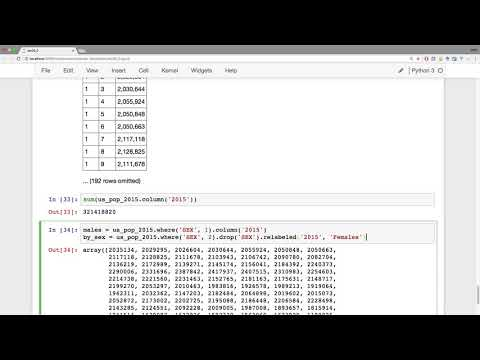

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('SAJavz58uHk', width=800, height=300)

## Males & Females

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [25]:
us_pop_2015 = us_pop.drop('2010').where('AGE', are.below(999)).where('SEX', are.above(0))
us_pop_2015

SEX,AGE,2015
1,0,"2,035,134"
1,1,"2,029,295"
1,2,"2,026,604"
1,3,"2,030,644"
1,4,"2,055,924"
1,5,"2,050,848"
1,6,"2,050,663"
1,7,"2,117,118"
1,8,"2,128,825"
1,9,"2,111,678"


In [26]:
sum(us_pop_2015.column(2))

321418820

In [27]:
males = us_pop_2015.where('SEX', 1).column('2015')
by_sex = us_pop_2015.where('SEX', 2).drop('SEX').relabeled('2015', 'Females').with_column('Males', males)
by_sex.set_format('Males', NumberFormatter)

AGE,Females,Males
0,"1,942,904","2,035,134"
1,"1,939,269","2,029,295"
2,"1,939,979","2,026,604"
3,"1,943,417","2,030,644"
4,"1,964,111","2,055,924"
5,"1,967,310","2,050,848"
6,"1,968,544","2,050,663"
7,"2,031,242","2,117,118"
8,"2,039,062","2,128,825"
9,"2,021,886","2,111,678"


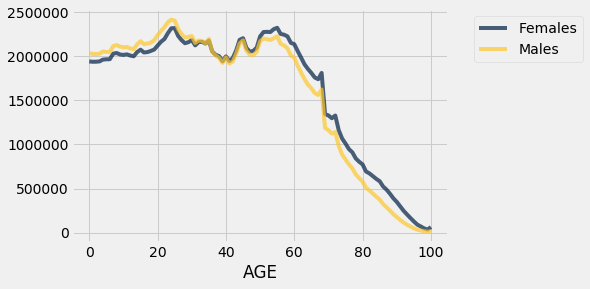

In [28]:
by_sex.plot(0)